# Acquiring Beer Data 

From Brewerydb: https://www.brewerydb.com/

In [7]:
#import dependencies
import api_setup as ap
from tqdm import tqdm
import pandas as pd

In [38]:
beer_data = pd.DataFrame()
# withBreweries and withIngredients are completely empty
beer_features = ['id', 'name', 'nameDisplay', 'abv', 'styleId', 'year', 'glasswareId','isOrganic', 'breweries',
                'glasswareId', 'isRetired', 'status', 'statusDisplay','ingredients']

for feature in beer_features:
    beer_data[feature]=''

count=0
for p in tqdm(range(1,2)):
    print(p)
    data = ap.get_data(page=p, custom='&withBreweries=Y&withIngredients=Y')
    try:
        for i in range(50):
            print("count "  + str(count) + 'data '+ str(i))
            for feature in beer_features:
                print('feature ' + feature + ' value ' + str(data['data'][i][feature]))
                if feature == 'breweries':
                    beer_data.set_value(count,feature,data['data'][i][feature][0]['id'])
                elif feature == 'ingredients':
                    print("am i fucking up")
                    try:
                        beer_data.set_value(count,feature,len(data['data'][i][feature]))
                    except Exception as e:
                        beer_data.set_value(count,feature,0)
                else:
                    try:
                        print('stuff')
                        beer_data.set_value(count,feature,data['data'][i][feature])
                    except Exception as e: 
                        print(f"name:{data['data'][i]['name']}, page:{p}, item:{i}, feature:{feature}, error:{e}")
                print('end feature')
            count+=1
            print(count)
            bear_data.tail(2)
    except Exception as e:
        print(e)
                      
                      

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

1
count 0data 0
feature id value c4f2KE
stuff


C:\Users\norfe\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


end feature
feature name value 'Murican Pilsner
stuff
end feature
feature nameDisplay value 'Murican Pilsner
stuff
end feature
feature abv value 5.5
stuff
end feature
feature styleId value 98
stuff
end feature
'year'


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]


In [21]:
data

{'currentPage': 1,
 'numberOfPages': 23,
 'totalResults': 1109,
 'data': [{'id': 'c4f2KE',
   'name': "'Murican Pilsner",
   'nameDisplay': "'Murican Pilsner",
   'abv': '5.5',
   'glasswareId': 4,
   'styleId': 98,
   'isOrganic': 'N',
   'isRetired': 'N',
   'labels': {'icon': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-icon.png',
    'medium': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-medium.png',
    'large': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-large.png',
    'contentAwareIcon': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-contentAwareIcon.png',
    'contentAwareMedium': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-contentAwareMedium.png',
    'contentAwareLarge': 'https://brewerydb-images.s3.amazonaws.com/beer/c4f2KE/upload_jjKJ7g-contentAwareLarge.png'},
   'status': 'verified',
   'statusDisplay': 'Verified',
   'createDate': '2013-08-19 11:58:12'

In [17]:
beer_data.head()

,id,name,nameDisplay,abv,styleId,year,glasswareId,isOrganic,breweries,isRetired,status,statusDisplay,ingredients
0,ndBEW0,Xtra Time,Xtra Time,4.4,108,2006,8,N,AqEUBQ,N,verified,Verified,NaN


> we'll change the column names from camel case to snake case for better consistency in notebook

In [4]:
beer_data.rename(columns={'id':'beer_id', 'nameDisplay':'display_name','isOrganic':'organic','isRetired':'retired','breweries':'brewery_id', 'styleId':'style_id', 'glasswareId':'glass_id'}, inplace=True)

In [5]:
beer_data.drop('statusDisplay',axis=1, inplace=True)

In [10]:
beer_data.shape

(1109, 11)

In [6]:
beer_data.head()

,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
1,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,164,NaN,NaN,N,nHLlnK,N,verified
2,zfP2fK,12th Of Never,12th Of Never,5.5,25,NaN,NaN,N,nLsoQ9,N,verified
3,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,5,NaN,NaN,N,TMc6H2,N,verified
4,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,35,NaN,NaN,N,TMc6H2,N,verified


In [7]:
beer_data.to_csv("data/beers.csv")

> we can see that there are 263 beers of the 1109 total beers that have a value for glass_id

In [9]:
beer_glass = beer_data[beer_data["glass_id"].notna()]
print(beer_glass.shape)
beer_glass.head()

(263, 11)


,beer_id,name,display_name,abv,style_id,year,glass_id,organic,brewery_id,retired,status
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,98,NaN,4,N,nHLlnK,N,verified
10,qGDeH1,2 x 4,2 x 4,8.7,70,NaN,5,N,nHLlnK,N,verified
14,uIgENV,20th Street Ale Citra,20th Street Ale Citra,7.3,NaN,NaN,5,N,nHLlnK,N,verified
25,NoNhan,420 Extra Pale Ale,420 Extra Pale Ale,5.4,25,NaN,5,N,TMc6H2,N,verified
29,fa0oqf,471 ESB - Extra Special Bitter,471 ESB - Extra Special Bitter,7.8,5,NaN,5,N,IImUD9,Y,verified


> Below, we can see the distribution of the glasses. The majority of the beers use glass5. Because of the lack of data in several other glass_id's, it would not be safe to generalize the data over other beers/glasses

In [12]:
beer_glass.groupby('glass_id').count()['beer_id']

glass_id
1      1
2      1
3      4
4     15
5    214
6      9
8     15
9      4
Name: beer_id, dtype: int64

> before we can create our plots, we need to clean the data and make sure that the data types are consistent with the requirements for the plot. 

In [15]:
# beer_glass.info() 
# shows that all variables are categorical and abv should be turned into a float and glass_id to int to be able to plot
beer_glass['abv'] = beer_glass['abv'].astype(float)
beer_glass['glass_id'] = beer_glass['glass_id'].astype(int)
beer_glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 1106
Data columns (total 11 columns):
beer_id         263 non-null object
name            263 non-null object
display_name    263 non-null object
abv             259 non-null float64
style_id        258 non-null object
year            20 non-null object
glass_id        263 non-null int64
organic         263 non-null object
brewery_id      263 non-null object
retired         263 non-null object
status          263 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 24.7+ KB


/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/MacBookPro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


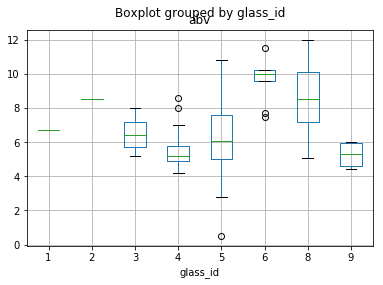

In [16]:
abv_glass = beer_glass.boxplot('abv', "glass_id")

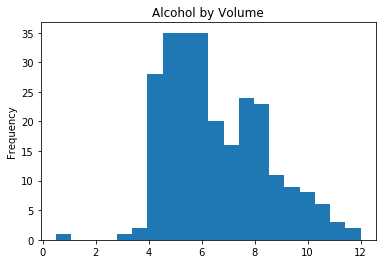

In [17]:
abv_hist = beer_glass.plot(y='abv', kind='hist', bins=20, title='Alcohol by Volume', legend=False)